## Import Libraries


In [1]:
import certifi
import os
import polars as pl
import pandas as pd
import numpy as np
import torch 
os.environ['SSL_CERT_FILE'] = certifi.where()
from giza_datasets import DatasetsLoader, DatasetsHub


# Data Collection


### Liquidations 

In [2]:
# Lets instantiate a DatasetsHub object to query the datasets collection.
hub = DatasetsHub()

# We can query the datasets collection by tags, name, or description.
datasets = hub.get_by_tag('Aave-v2')

# Loop through the returned list to print the dataset names and descriptions.
for dataset in datasets:
    hub.describe(dataset.name)

                                         Details for tvl-fee-per-protocol                                          
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Attribute     ┃ Value                                                                                           ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Path          │ gs://datasets-giza/TVL_fee_per_protocol                                                         │
├───────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Description   │ TVL and fees for each protocol-chain pair and for each day.                                     │
├───────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Tags          │ aggregated, daily, TVL, Fees, Multi-chain, Lido, Rocket-pool, Binance-staked-eth,               │
│               │ Mantle-staked-eth, Frax-ether, Uniswap-v3, Curve-dex, Uniswap-v2, Pancakeswap-amm, Balancer-v2, │
│               │ Pancakeswap-amm-v3, Sushiswap, Thorchain, Convex-finance, Stakestone, Aura, Pendle, Coinwind,   │
│               │ Penpie, Aave-v3, Aave-v2, Spark, Compound-v3, Compound-v2, Morpho-aave, Morpho-aavev3,          │
│               │ Benqi-lending, Radiant-v2, Yearn-finance, Beefy, Origin-ether, Flamincome, Sommelier, Liquid    │
│               │ Staking, Dexes, Yield, Lending, Yield Aggregator                                                │
├───────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Documentation │ https://datasets.gizatech.xyz/hub/aggregated-datasets/tvl-and-fees-per-protocol                 │
└───────────────┴─────────────────────────────────────────────────────────────────────────────────────────────────┘

                                      Details for top-pools-apy-per-protocol                                       
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Attribute     ┃ Value                                                                                           ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Path          │ gs://datasets-giza/top_pools_APY_per_protocol                                                   │
├───────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Description   │ Daily historical APY of the pools with the highest TVL for each project described in the        │
│               │ tvl-fee-per-protocol dataset                                                                    │
├───────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Tags          │ aggregated, daily, APY, Lido, Rocket-pool, Binance-staked-eth, Mantle-staked-eth, Frax-ether,   │
│               │ Uniswap-v3, Curve-dex, Uniswap-v2, Pancakeswap-amm, Balancer-v2, Pancakeswap-amm-v3, Sushiswap, │
│               │ Thorchain, Convex-finance, Stakestone, Aura, Pendle, Coinwind, Penpie, Aave-v3, Aave-v2, Spark, │
│               │ Compound-v3, Compound-v2, Morpho-aave, Morpho-aavev3, Benqi-lending, Radiant-v2, Yearn-finance, │
│               │ Beefy, Origin-ether, Flamincome, Sommelier, Liquid Staking, Dexes, Yield, Lending, Yield        │
│               │ Aggregator                                                                                      │
├───────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Documentation │ https://datasets.gizatech.xyz/hub/aggregated-datasets/top-pools-apy-per-protocol                │
└───────────────┴─────────────────────────────────────────────────────────────────────────────────────────────────┘

                       Details for aave-daily-deposits-borrowsv2                        
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Attribute     ┃ Value                                                                ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Path          │ gs://datasets-giza/Aave/Aave_Daily_Deposits_BorrowsV2.parquet        │
├───────────────┼──────────────────────────────────────────────────────────────────────┤
│ Description   │ Daily deposits and borrows per pool in Aave V2                       │
├───────────────┼──────────────────────────────────────────────────────────────────────┤
│ Tags          │ DeFi, Lending, Aave-v2, Ethereum, Borrows & Deposits                 │
├───────────────┼──────────────────────────────────────────────────────────────────────┤
│ Documentation │ https://datasets.gizatech.xyz/hub/aave/daily-deposits-and-borrows-v2 │
└───────────────┴──────────────────────────────────────────────────────────────────────┘

                                Details for aave-liquidationsV2                                
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Attribute     ┃ Value                                                                       ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Path          │ gs://datasets-giza/Aave/Aave_LiquidationsV2.parquet                         │
├───────────────┼─────────────────────────────────────────────────────────────────────────────┤
│ Description   │ Individual liquidations in Aave v2, including colleteral and lending values │
├───────────────┼─────────────────────────────────────────────────────────────────────────────┤
│ Tags          │ DeFi, Lending, Aave-v2, Ethereum, Liquiditations                            │
├───────────────┼─────────────────────────────────────────────────────────────────────────────┤
│ Documentation │ https://datasets.gizatech.xyz/hub/aave/liquidations-v2                      │
└───────────────┴─────────────────────────────────────────────────────────────────────────────┘

In [3]:
datasets = hub.get_by_tag('Aave-v3')

for dataset in datasets:
    hub.describe(dataset.name)

                                         Details for tvl-fee-per-protocol                                          
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Attribute     ┃ Value                                                                                           ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Path          │ gs://datasets-giza/TVL_fee_per_protocol                                                         │
├───────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Description   │ TVL and fees for each protocol-chain pair and for each day.                                     │
├───────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Tags          │ aggregated, daily, TVL, Fees, Multi-chain, Lido, Rocket-pool, Binance-staked-eth,               │
│               │ Mantle-staked-eth, Frax-ether, Uniswap-v3, Curve-dex, Uniswap-v2, Pancakeswap-amm, Balancer-v2, │
│               │ Pancakeswap-amm-v3, Sushiswap, Thorchain, Convex-finance, Stakestone, Aura, Pendle, Coinwind,   │
│               │ Penpie, Aave-v3, Aave-v2, Spark, Compound-v3, Compound-v2, Morpho-aave, Morpho-aavev3,          │
│               │ Benqi-lending, Radiant-v2, Yearn-finance, Beefy, Origin-ether, Flamincome, Sommelier, Liquid    │
│               │ Staking, Dexes, Yield, Lending, Yield Aggregator                                                │
├───────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Documentation │ https://datasets.gizatech.xyz/hub/aggregated-datasets/tvl-and-fees-per-protocol                 │
└───────────────┴─────────────────────────────────────────────────────────────────────────────────────────────────┘

                                      Details for top-pools-apy-per-protocol                                       
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Attribute     ┃ Value                                                                                           ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Path          │ gs://datasets-giza/top_pools_APY_per_protocol                                                   │
├───────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Description   │ Daily historical APY of the pools with the highest TVL for each project described in the        │
│               │ tvl-fee-per-protocol dataset                                                                    │
├───────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Tags          │ aggregated, daily, APY, Lido, Rocket-pool, Binance-staked-eth, Mantle-staked-eth, Frax-ether,   │
│               │ Uniswap-v3, Curve-dex, Uniswap-v2, Pancakeswap-amm, Balancer-v2, Pancakeswap-amm-v3, Sushiswap, │
│               │ Thorchain, Convex-finance, Stakestone, Aura, Pendle, Coinwind, Penpie, Aave-v3, Aave-v2, Spark, │
│               │ Compound-v3, Compound-v2, Morpho-aave, Morpho-aavev3, Benqi-lending, Radiant-v2, Yearn-finance, │
│               │ Beefy, Origin-ether, Flamincome, Sommelier, Liquid Staking, Dexes, Yield, Lending, Yield        │
│               │ Aggregator                                                                                      │
├───────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Documentation │ https://datasets.gizatech.xyz/hub/aggregated-datasets/top-pools-apy-per-protocol                │
└───────────────┴─────────────────────────────────────────────────────────────────────────────────────────────────┘

                       Details for aave-daily-deposits-borrowsv3                        
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Attribute     ┃ Value                                                                ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Path          │ gs://datasets-giza/Aave/Aave_Daily_Deposits_BorrowsV3.parquet        │
├───────────────┼──────────────────────────────────────────────────────────────────────┤
│ Description   │ Daily deposits and borrows per pool in Aave V3                       │
├───────────────┼──────────────────────────────────────────────────────────────────────┤
│ Tags          │ DeFi, Lending, Aave-v3, Ethereum, Borrows & Deposits                 │
├───────────────┼──────────────────────────────────────────────────────────────────────┤
│ Documentation │ https://datasets.gizatech.xyz/hub/aave/daily-deposits-and-borrows-v3 │
└───────────────┴──────────────────────────────────────────────────────────────────────┘

                                       Details for aave-daily-rates-indexes                                        
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Attribute     ┃ Value                                                                                           ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Path          │ gs://datasets-giza/Aave/Aave_Daily_Rates_Indexes.parquet                                        │
├───────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Description   │ Daily average stable and variable borrow rates, as well as liquidity and borrow indexes per     │
│               │ pool in Aave V3 and V2                                                                          │
├───────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Tags          │ DeFi, Lending, Aave-v3, Ethereum, Swap Fees                                                     │
├───────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Documentation │ https://datasets.gizatech.xyz/hub/aave/daily-exchange-rates-and-indexes-v3                      │
└───────────────┴─────────────────────────────────────────────────────────────────────────────────────────────────┘

                                Details for aave-liquidationsV3                                
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Attribute     ┃ Value                                                                       ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Path          │ gs://datasets-giza/Aave/Aave_LiquidationsV3.parquet                         │
├───────────────┼─────────────────────────────────────────────────────────────────────────────┤
│ Description   │ Individual liquidations in Aave v3, including colleteral and lending values │
├───────────────┼─────────────────────────────────────────────────────────────────────────────┤
│ Tags          │ DeFi, Lending, Aave-v3, Ethereum, Liquiditations                            │
├───────────────┼─────────────────────────────────────────────────────────────────────────────┤
│ Documentation │ https://datasets.gizatech.xyz/hub/aave/liquidations-v3                      │
└───────────────┴─────────────────────────────────────────────────────────────────────────────┘

In [4]:
# Now, lets instantiate a DatasetsLoader object to load the datasets.
loader = DatasetsLoader()

# We can load the datasets by name, also changing the dataframe library from Polars to Pandas.
df_liquidations_v2 = loader.load("aave-liquidationsV2").to_pandas()
df_liquidations_v3 = loader.load("aave-liquidationsV3").to_pandas()

In [5]:
df_liquidations_v2.head()

,day,liquidator,user,token_col,token_debt,col_contract_address,collateral_amount,col_value_USD,col_current_value_USD,debt_contract_address,debt_amount,debt_value_USD,debt_current_value_USD
0,2023-04-11,0xb0bababe78a9be0810fadf99dd2ed31ed12568be,0xd2cc11133e247dcd5f0180b1ea12102446bd941d,USDC,WBTC,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,278015.225410,278007.237299,278310.932646,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,8.757274,263582.379167,374953.018188
1,2023-05-08,0x50a77ba863dbaa84269133e5625ef80072f1884a,0xa6b94ce98d6cd4f447a9c6788f169dd17f65f747,ENS,DAI,0xc18360217d8f7ab5e7c516566761ea12ce7f9d72,164.939423,1730.976245,2998.650521,0x6b175474e89094c44da98b954eedeac495271d0f,1516.157028,1518.349407,1516.915725
2,2023-12-19,0x5c5c1776c16ef823e6582dd2747018ca5638e972,0xab192cf0d1d01203862f618b65b31fdedb8b3305,ENS,DAI,0xc18360217d8f7ab5e7c516566761ea12ce7f9d72,3053.240456,25359.282296,55508.870630,0x6b175474e89094c44da98b954eedeac495271d0f,23108.657178,23132.368747,23120.220944
3,2023-02-09,0xb0bababe78a9be0810fadf99dd2ed31ed12568be,0x37ffe93c07b80062454dcca32c4c0971956ab0bd,stETH,GUSD,0xae7ab96520de3a18e5e111b5eaab095312d7fe84,3.211887,5196.531108,7415.705901,0x056fd409e1d7a124bd7017459dfea2f387b6d5cd,4598.650000,4624.136932,4593.069478
4,2023-12-09,0x6fb323bc0a1c0e5991bfc2088b02b6185d8d4232,0x16661cca7739732289a9cd6cb26baf7494da268e,WETH,BUSD,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,2.575332,6081.965793,5940.943923,0x4fabb145d64652a948d72533023f6e7a623c7c53,5744.366521,5749.232398,5746.846974


In [6]:
df_liquidations_v3.head()

,day,liquidator,user,token_col,token_debt,col_contract_address,collateral_amount,col_value_USD,col_current_value_USD,debt_contract_address,debt_amount,debt_value_USD,debt_current_value_USD
0,2023-03-09,0xac9683c436e4acca9e6d9653ce13016e8e2ac3d0,0x7ed571262cdae3367af4fa621ab0f480d7242409,WETH,USDT,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,1.333622,2028.273468,3076.485631,0xdac17f958d2ee523a2206206994597c13d831ec7,1936.792666,1937.803591,1937.549218
1,2023-07-07,0x6dce52e318338b0cc30969ada8e0c95d24c37a28,0xad591a6d35237dada634d43c1c9a5b10d6ed36f6,WBTC,USDT,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,0.025941,783.077894,1110.712027,0xdac17f958d2ee523a2206206994597c13d831ec7,748.197446,748.664308,748.489708
2,2023-09-24,0x1a2d11cb90d1de13bb81ee7b772a08ac234a8058,0x7420fa58ba44e1141d5e9adb6903be549f7ce0b5,WBTC,USDC,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,0.013772,365.824032,589.668256,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,346.654213,346.956190,347.022927
3,2023-07-14,0x7d32c90762e22379235fc311fdb16fab399ed40a,0xfad9ea29ae51b72a605c9952fe49048c76109577,WBTC,rETH,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,0.051218,1589.116490,2192.963712,0xae78736cd615f374d3085123a210448e74fc6393,0.705086,1514.831413,1786.174433
4,2023-08-23,0x681d0d7196a036661b354fa2a7e3b73c2adc43ec,0xba006ea5d47eff88efaae09a268d65f2edfb10ae,wstETH,USDC,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,0.143611,270.032374,382.924026,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,252.666412,252.806825,252.935157


In [7]:
# For this example, we will concatenate the two datasets into a single dataframe and add a column to indicate the version of the dataset.
df_liquidations = pd.concat([df_liquidations_v2, df_liquidations_v3], keys=['v2', 'v3'])
df_liquidations['version'] = df_liquidations.index.get_level_values(0)

In [8]:
df_liquidations['token_debt'].value_counts()

token_debt
USDC      747
USDT      471
DAI       266
WETH      232
BUSD      222
SNX       124
WBTC      116
TUSD       93
GHO        69
LINK       54
GUSD       20
1INCH      20
sUSD       18
MKR        16
ENJ        13
wstETH     12
FEI        11
ENS         9
DPI         8
ZRX         7
RPL         6
PAX         5
AMPL        5
CRV         4
REN         4
FRAX        4
LUSD        4
cbETH       3
UNI         2
YFI         2
BAL         1
BAT         1
MANA        1
rETH        1
xSUSHI      1
RAI         1
crvUSD      1
Name: count, dtype: int64

A lot of debt positions with unique tokens have been liquidated , but most are very sparse. It might be a good idea to focus on the tokens with high density data.

In [9]:
df_liquidations['token_col'].value_counts()

token_col
WETH      955
USDC      391
LINK      256
WBTC      187
stETH     101
DAI        81
AAVE       75
ENJ        62
UNI        55
MANA       45
wstETH     43
ENS        41
xSUSHI     31
CRV        30
YFI        28
SNX        24
KNC        23
REN        23
MKR        19
1INCH      16
BAL        14
rETH       13
CVX        12
BAT        11
TUSD       11
ZRX         8
FEI         8
DPI         5
USDT        3
cbETH       2
LDO         1
Name: count, dtype: int64

Same is true for the collaterals of those debt positions, lets filter them by only selecting the highest density tokens.

In [10]:
df_liquidations = df_liquidations[df_liquidations['token_col'].isin(["WETH","USDC","LINK","WBTC","stETH"])]

In [11]:
# Create a list of the selected tokens, will be useful when merging with other datasets.
token_list = ["WETH","USDC","LINK","WBTC","stETH"]

In [12]:
df_liquidations['token_debt'].value_counts()

token_debt
USDC      565
USDT      369
BUSD      197
DAI       154
WETH      144
SNX       103
WBTC       96
TUSD       63
LINK       49
GHO        40
1INCH      18
GUSD       17
wstETH     11
MKR        11
ENS         8
sUSD        8
FEI         6
ZRX         5
ENJ         5
PAX         4
DPI         3
AMPL        3
LUSD        2
RPL         2
cbETH       2
xSUSHI      1
FRAX        1
BAT         1
rETH        1
crvUSD      1
Name: count, dtype: int64

In [13]:
df_liquidations = df_liquidations[df_liquidations['token_debt'].isin(["USDC","USDT","DAI","WETH","WBTC"])]

In [14]:
token_list += ["USDT","DAI"]
print(token_list)

['WETH', 'USDC', 'LINK', 'WBTC', 'stETH', 'USDT', 'DAI']


In [15]:
df_liquidations.head()

day                                  liquidator  \
v2 0  2023-04-11  0xb0bababe78a9be0810fadf99dd2ed31ed12568be   
   15 2023-12-22  0xb6569481dccddd527c2b0e8ba32f494e52224ca1   
   16 2023-08-18  0xb6569481dccddd527c2b0e8ba32f494e52224ca1   
   17 2023-08-18  0xb6569481dccddd527c2b0e8ba32f494e52224ca1   
   19 2023-04-14  0x80d4230c0a68fc59cb264329d3a717fcaa472a13   

                                             user token_col token_debt  \
v2 0   0xd2cc11133e247dcd5f0180b1ea12102446bd941d      USDC       WBTC   
   15  0xb87736c9c2ddbbab1d6b59955a2d5afb8713c2db      WETH       USDT   
   16  0x8bf8214c5824fa5cc90b548ff95cf3adf3fcb8bf      WETH       USDT   
   17  0x3b0142071b8c19b6676a39da947119bcbe94a85a      WETH       USDT   
   19  0xac047a2e944f7a2ed4eed793b723a1911a56c1dd      USDC       USDT   

                             col_contract_address  collateral_amount  \
v2 0   0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48      278015.225410   
   15  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2           0.452147   
   16  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2           0.161155   
   17  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2           0.284276   
   19  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48      171237.281319   

       col_value_USD  col_current_value_USD  \
v2 0   278007.237299          278310.932646   
   15    1038.763137            1043.042712   
   16     270.319173             371.763898   
   17     476.840109             655.787512   
   19  171228.584487          171419.415600   

                            debt_contract_address    debt_amount  \
v2 0   0x2260fac5e5542a773aa44fbcfedf7c193bc2c599       8.757274   
   15  0xdac17f958d2ee523a2206206994597c13d831ec7     961.990080   
   16  0xdac17f958d2ee523a2206206994597c13d831ec7     255.629377   
   17  0xdac17f958d2ee523a2206206994597c13d831ec7     455.611261   
   19  0xdac17f958d2ee523a2206206994597c13d831ec7  159396.050408   

       debt_value_USD  debt_current_value_USD version  
v2 0    263582.379167           374953.018188      v2  
   15      963.569080              962.365854      v2  
   16      255.792001              255.729231      v2  
   17      455.901107              455.789232      v2  
   19   159555.800118           159458.313861      v2

In [16]:
# Lets get rid of columns that are not useful for this analysis.
df_liquidations = df_liquidations.drop(columns=['user', 'liquidator', 'version','col_contract_address','debt_contract_address'])


In [17]:
# Lets aggregate the data by day, token_col, and token_debt, summing the collateral and debt amounts, as well as the collateral and debt values in USD.
df_liquidations_daily = df_liquidations.groupby(['day', 'token_col', 'token_debt']).agg({
    'collateral_amount': 'sum',
    'col_value_USD': 'sum',
    'col_current_value_USD': 'sum',
    'debt_amount': 'sum',
    'debt_value_USD': 'sum',
    'debt_current_value_USD': 'sum'
}).reset_index()


In [18]:
df_liquidations_daily.tail()

,day,token_col,token_debt,collateral_amount,col_value_USD,col_current_value_USD,debt_amount,debt_value_USD,debt_current_value_USD
638,2024-01-31,WETH,USDC,1.384429,3214.134430,3193.691128,3074.447380,3076.539050,3077.717476
639,2024-02-01,WETH,USDC,0.170316,388.419669,392.896896,367.619865,367.865787,368.010879
640,2024-02-03,LINK,USDT,29.523066,526.159460,555.050636,487.060337,487.257649,487.250593
641,2024-02-04,WETH,USDC,0.152232,350.318017,351.179303,333.068235,333.489481,333.422499
642,2024-02-05,WETH,DAI,63.357265,146156.671281,146156.671281,140373.460063,140443.704118,140443.704118


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

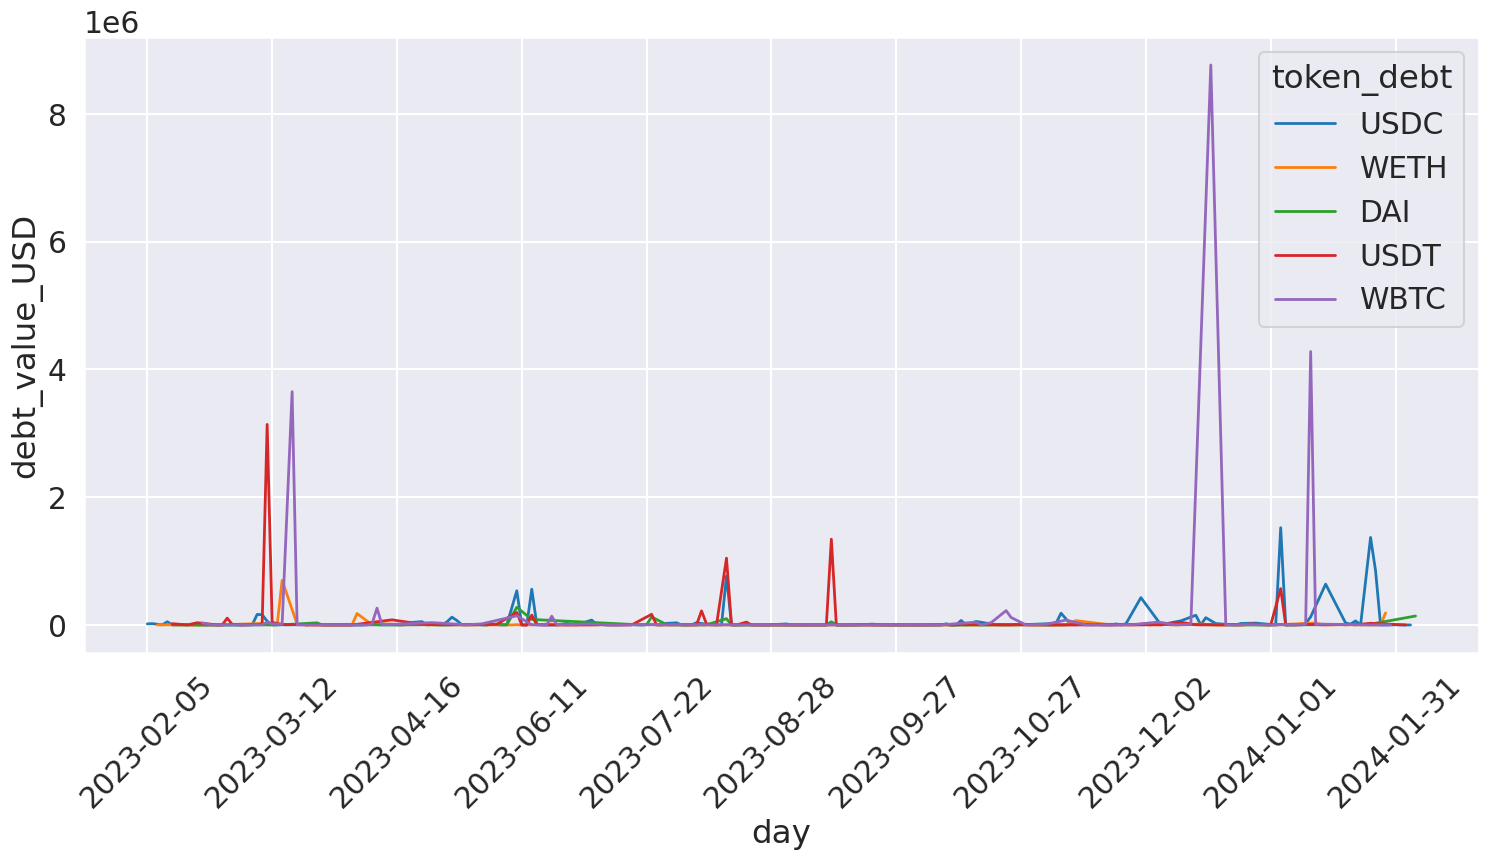

In [20]:
sns.set_context("talk", font_scale=1.3)

with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(18,8))
    sns.lineplot(x=df_liquidations_daily.day.dt.strftime('%Y-%m-%d'), y=df_liquidations_daily.debt_value_USD, hue=df_liquidations_daily.token_debt, linewidth=2, legend='brief', errorbar=None)
    ax.xaxis.set_major_locator(plt.MaxNLocator(12))  # Set the maximum number of ticks to 12 for monthly resolution
    ax.xaxis.set_major_locator(plt.FixedLocator(ax.get_xticks()))  # Set the x-axis tick locations
    plt.xticks(rotation=45)  # Rotate the x-axis tick labels by 45 degrees


Obviously, liquidations happen more when the market unstable and volatile, which is why we see a lot of liquidations happening around March 2023 and January 2024.

## Deposits & Borrows


Lets load the historical daily deposits & borrows dataset, with similar transformations to what we did with liquidations.

In [21]:
df_deposits_borrows_v2 = loader.load("aave-daily-deposits-borrowsv2").to_pandas()
df_deposits_borrows_v3 = loader.load("aave-daily-deposits-borrowsv3").to_pandas()

df_deposits_borrows = pd.concat([df_deposits_borrows_v2, df_deposits_borrows_v3], keys=['v2', 'v3'])
df_deposits_borrows['version'] = df_deposits_borrows.index.get_level_values(0)

df_deposits_borrows = df_deposits_borrows.groupby(['day', 'symbol']).sum().reset_index()
df_deposits_borrows = df_deposits_borrows.drop(columns=['version','contract_address'])


df_deposits_borrows.head()

,day,symbol,deposits_volume,borrows_volume
0,2023-01-21,1INCH,52366.722411,0.000000e+00
1,2023-01-21,AAVE,115521.963715,0.000000e+00
2,2023-01-21,BUSD,1500.707401,1.500707e+03
3,2023-01-21,CRV,140475.779042,0.000000e+00
4,2023-01-21,DAI,585783.010677,6.170639e+06


In [22]:
df_deposits_borrows = df_deposits_borrows[df_deposits_borrows['symbol'].isin(token_list)]

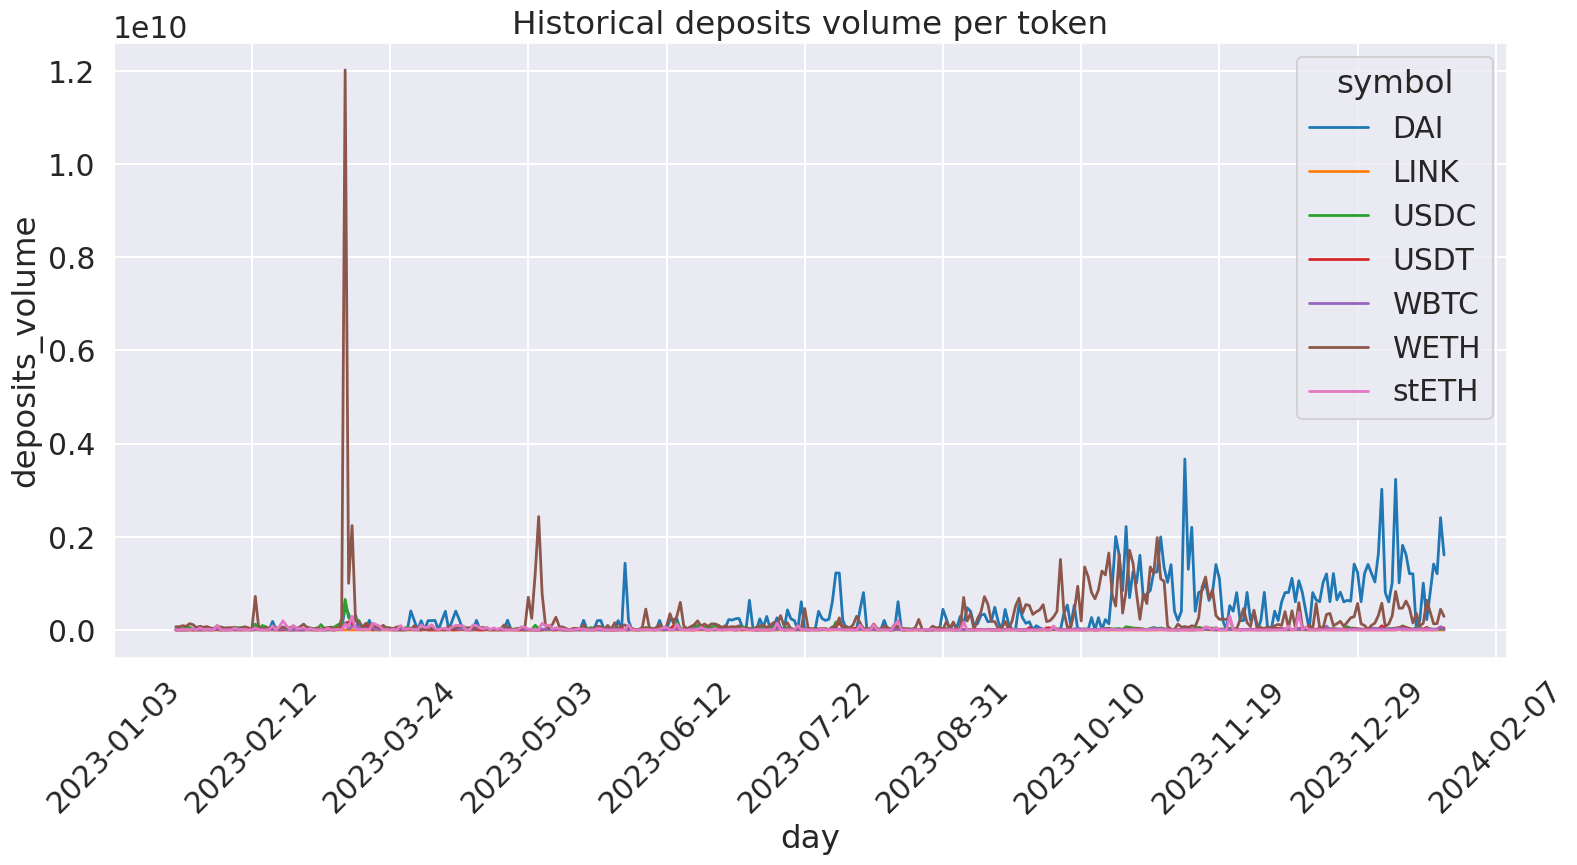

In [23]:
sns.set_context("talk", font_scale=1.3)

with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(18,8))
    sns.lineplot(x=df_deposits_borrows.day, y=df_deposits_borrows.deposits_volume, hue=df_deposits_borrows.symbol, linewidth=2, legend='brief', errorbar=None) 
    ax.xaxis.set_major_locator(plt.MaxNLocator(12))  # Set the maximum number of ticks to 12 for monthly resolution
    #ax.xaxis.set_major_formatter(plt.FixedFormatter(df_deposits_borrows.day.dt.strftime('%Y-%m')))  # Format the x-axis labels as 'YYYY-MM'
    plt.xticks(rotation=45)  # Rotate the x-axis tick labels by 45 degrees
    ax.set_title("Historical deposits volume per token")

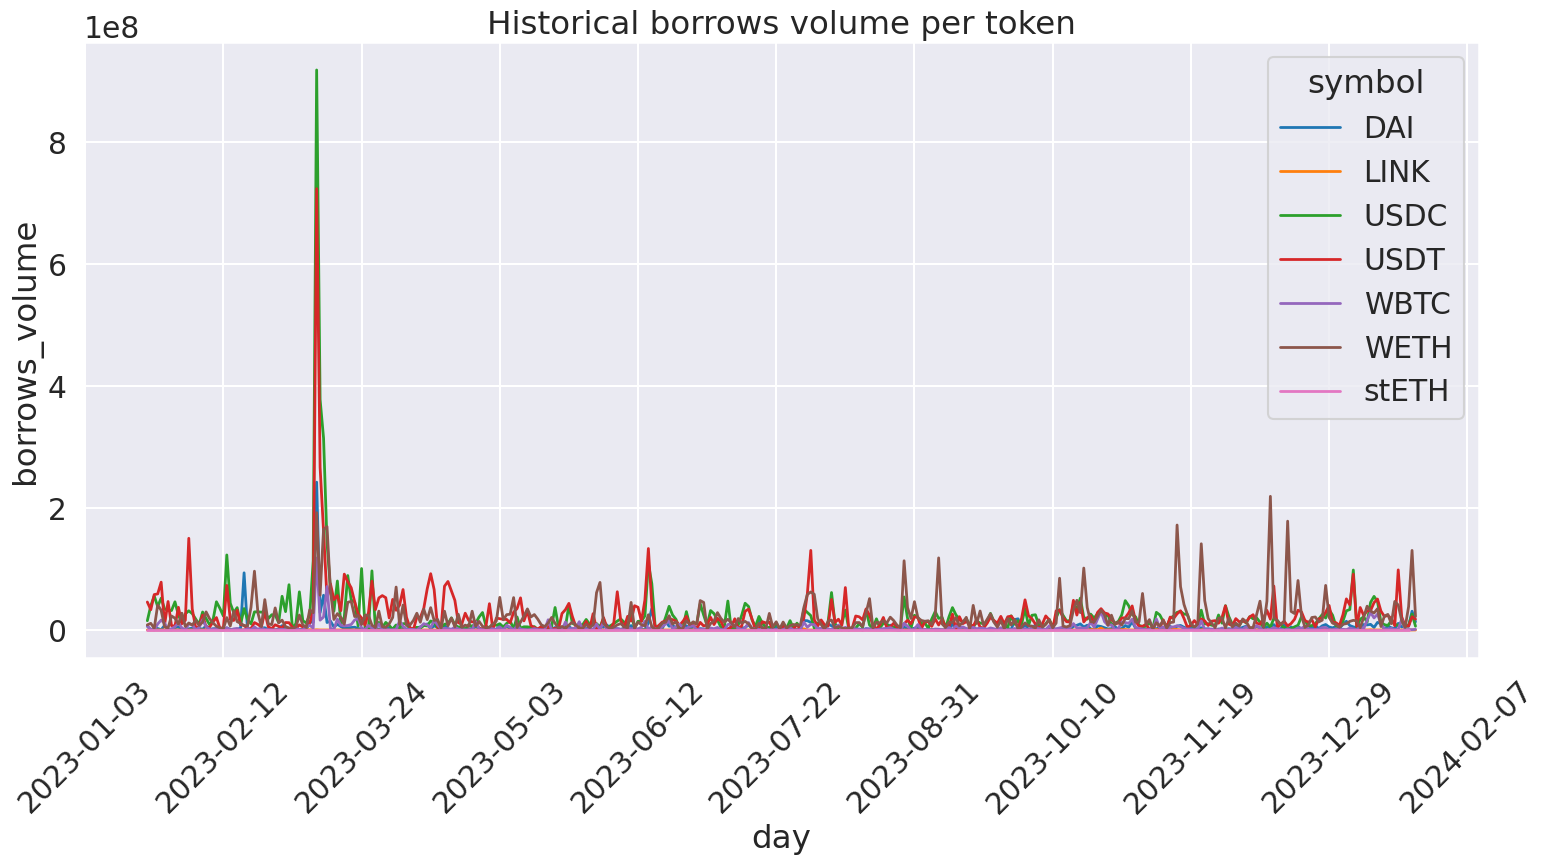

In [24]:
sns.set_context("talk", font_scale=1.3)

with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(18,8))
    sns.lineplot(x=df_deposits_borrows.day, y=df_deposits_borrows.borrows_volume, hue=df_deposits_borrows.symbol, linewidth=2, legend='brief', errorbar=None) 
    ax.xaxis.set_major_locator(plt.MaxNLocator(12))  # Set the maximum number of ticks to 12 for monthly resolution
    #ax.xaxis.set_major_formatter(plt.FixedFormatter(df_deposits_borrows.day.dt.strftime('%Y-%m')))  # Format the x-axis labels as 'YYYY-MM'
    plt.xticks(rotation=45)  # Rotate the x-axis tick labels by 45 degrees    
    ax.set_title("Historical borrows volume per token")


## Daily Token Info

Finally, lets load the aggregate token market data, applying similar transformations.

In [25]:
df_daily_token = loader.load('tokens-daily-prices-mcap-volume').to_pandas()

df_daily_token.head()

,date,price,market_cap,volumes_last_24h,token
0,2019-02-01,3438.360403,0.0,20589.040403,WBTC
1,2019-02-02,3472.243307,0.0,12576.723906,WBTC
2,2019-02-03,3461.058341,0.0,1852.526033,WBTC
3,2019-02-04,3468.160040,0.0,7029.292885,WBTC
4,2019-02-05,3476.127865,0.0,3544.645877,WBTC


In [26]:
df_daily_token.token.value_counts()

token
USDT       3245
ETH        3104
GNO        2470
BAT        2434
ZRX        2303
LINK       2280
MKR        2239
WETH       2173
TUSD       2146
USDC       1950
WBTC       1831
DAI        1540
COMP       1330
YFI        1298
SUSHI      1257
UNI        1237
AAVE       1221
3CRV       1195
WOO        1194
FRAX       1142
STETH      1141
WMATIC     1077
ALCX       1074
ALUSD      1043
WAVAX      1012
CVX         995
MIM         950
WSTETH      852
RETH        805
SAVAX       717
COW         680
STMATIC     679
FRXETH      430
Name: count, dtype: int64

In [27]:
token_list_upper = [token.upper() for token in token_list]

df_daily_token = df_daily_token[df_daily_token['token'].isin(token_list_upper)]

df_daily_token.token.value_counts()

token
USDT     3245
LINK     2280
WETH     2173
USDC     1950
WBTC     1831
DAI      1540
STETH    1141
Name: count, dtype: int64

# 1) Using only Debts


There are multiple different approaches to the prediction of liquidations, but to make things simple for now, we are only going to focus on the debt token.

In [28]:
df_liquidations_debts = df_liquidations_daily.drop(columns=['token_col','collateral_amount', 'col_value_USD', 'col_current_value_USD'])

Lets find the earliest day in the liquidations dataset, and for every day between that day and the last day, fill the dataset with empty rows for each token if no liquidations happened in that particular day with the given token_debt

In [29]:
earliest_day = df_liquidations_debts['day'].min()

# Create a new dataframe to store the filled rows
filled_rows = pd.DataFrame()

# Iterate over each unique token_col
for unique_token in df_liquidations_debts['token_debt'].unique():
    # Filter the dataframe for the specific token_col
    token_col_df = df_liquidations_debts[df_liquidations_debts['token_debt'] == unique_token]
    
    # Find the missing days since the earliest day
    missing_days = pd.date_range(start=earliest_day, end=token_col_df['day'].max(), freq='D').difference(token_col_df['day'])
    
    # Create rows with 0 values for the missing days
    missing_rows = pd.DataFrame({
        'day': missing_days,
        'token_debt': unique_token,
        'debt_amount': 0,
        'debt_value_USD': 0,
        'debt_current_value_USD': 0
    })
    
    # Append the missing rows to the filled_rows dataframe
    filled_rows = pd.concat([missing_rows,filled_rows])

# Concatenate the filled_rows dataframe with the original df_liquidations_debts dataframe
df_liquidations_debts_filled = pd.concat([df_liquidations_debts, filled_rows])

# Sort the dataframe by day
df_liquidations_debts_filled = df_liquidations_debts_filled.sort_values('day')

# Reset the index of the dataframe
df_liquidations_debts_filled = df_liquidations_debts_filled.reset_index(drop=True)

df_liquidations_debts_filled.head()


,day,token_debt,debt_amount,debt_value_USD,debt_current_value_USD
0,2023-02-05,USDC,17102.397407,17118.267363,17120.588147
1,2023-02-05,USDT,0.000000,0.000000,0.000000
2,2023-02-05,DAI,0.000000,0.000000,0.000000
3,2023-02-05,WETH,0.000000,0.000000,0.000000
4,2023-02-05,WBTC,0.000000,0.000000,0.000000


Were going to use lagged features, so lets get the date which corresponds to the day that is one week earlier than the last day in the previous dataframe, and then merge the dataframes.

In [30]:

# Calculate the date 7 days earlier than the earliest day
earliest_day_minus_7 = earliest_day - pd.DateOffset(days=7)


# Filter the df_deposits_borrows dataframe for dates greater than or equal to earliest_day_minus_7
df_deposits_borrows_filtered = df_deposits_borrows[df_deposits_borrows['day'] >= earliest_day_minus_7]

df_deposits_borrows_filtered = df_deposits_borrows_filtered.rename(columns={'symbol': 'token_debt',})


print(df_deposits_borrows_filtered['day'].min())

# Merge df_liquidations_debts_filled with df_deposits_borrows_filtered
merged_df = pd.merge(df_liquidations_debts_filled, df_deposits_borrows_filtered, how='outer', on=['day', 'token_debt'])

# Fill missing values with 0
merged_df.fillna(0, inplace=True)

merged_df.head()



2023-01-29 00:00:00


,day,token_debt,debt_amount,debt_value_USD,debt_current_value_USD,deposits_volume,borrows_volume
0,2023-01-29,DAI,0.0,0.0,0.0,1.747759e+06,3.797651e+06
1,2023-01-29,LINK,0.0,0.0,0.0,5.142959e+05,0.000000e+00
2,2023-01-29,USDC,0.0,0.0,0.0,3.074863e+07,4.617338e+07
3,2023-01-29,USDT,0.0,0.0,0.0,2.537875e+06,6.409452e+06
4,2023-01-29,WBTC,0.0,0.0,0.0,5.543362e+06,5.321338e+06


Do the same with token market info dataset.

In [31]:
# Filter the df_deposits_borrows dataframe for dates greater than or equal to earliest_day_minus_7
df_daily_token_filtered = df_daily_token[df_daily_token['date'] >= earliest_day_minus_7]

df_daily_token_filtered = df_daily_token_filtered.rename(columns={'token': 'token_debt','date':'day'})

merged_df['token_debt'] = merged_df['token_debt'].str.upper()

# Merge df_liquidations_debts_filled with df_deposits_borrows_filtered
merged_df = pd.merge(merged_df, df_daily_token_filtered, how='outer', on=['day', 'token_debt'])

# Fill missing values with 0
merged_df.fillna(0, inplace=True)

merged_df.head()

,day,token_debt,debt_amount,debt_value_USD,debt_current_value_USD,deposits_volume,borrows_volume,price,market_cap,volumes_last_24h
0,2023-01-29,DAI,0.0,0.0,0.0,1.747759e+06,3.797651e+06,0.999271,5.137362e+09,1.244064e+08
1,2023-01-29,LINK,0.0,0.0,0.0,5.142959e+05,0.000000e+00,7.210318,3.539190e+09,2.683055e+08
2,2023-01-29,STETH,0.0,0.0,0.0,9.316214e+06,0.000000e+00,1567.992355,7.848932e+09,6.729601e+07
3,2023-01-29,USDC,0.0,0.0,0.0,3.074863e+07,4.617338e+07,1.000236,4.316748e+10,2.474948e+09
4,2023-01-29,USDT,0.0,0.0,0.0,2.537875e+06,6.409452e+06,1.000895,6.756974e+10,2.890719e+10


### Feature Engineering

Lets calculate the 3 day and 7 day averages for deposits, borrows, market cap and daily trade volume.

In [32]:
# Calculate the average of the last 3 days for each column
merged_df['deposits_volume_avg_3d'] = merged_df['deposits_volume'].rolling(window=3, min_periods=1).mean()
merged_df['borrows_volume_avg_3d'] = merged_df['borrows_volume'].rolling(window=3, min_periods=1).mean()
merged_df['market_cap_avg_3d'] = merged_df['market_cap'].rolling(window=3, min_periods=1).mean()
merged_df['volumes_last_24h_avg_3d'] = merged_df['volumes_last_24h'].rolling(window=3, min_periods=1).mean()

# Calculate the average of the last 7 days for each column
merged_df['deposits_volume_avg_7d'] = merged_df['deposits_volume'].rolling(window=7, min_periods=1).mean()
merged_df['borrows_volume_avg_7d'] = merged_df['borrows_volume'].rolling(window=7, min_periods=1).mean()
merged_df['market_cap_avg_7d'] = merged_df['market_cap'].rolling(window=7, min_periods=1).mean()
merged_df['volumes_last_24h_avg_7d'] = merged_df['volumes_last_24h'].rolling(window=7, min_periods=1).mean()

merged_df.head()


,day,token_debt,debt_amount,debt_value_USD,debt_current_value_USD,deposits_volume,borrows_volume,price,market_cap,volumes_last_24h,deposits_volume_avg_3d,borrows_volume_avg_3d,market_cap_avg_3d,volumes_last_24h_avg_3d,deposits_volume_avg_7d,borrows_volume_avg_7d,market_cap_avg_7d,volumes_last_24h_avg_7d
0,2023-01-29,DAI,0.0,0.0,0.0,1.747759e+06,3.797651e+06,0.999271,5.137362e+09,1.244064e+08,1.747759e+06,3.797651e+06,5.137362e+09,1.244064e+08,1.747759e+06,3.797651e+06,5.137362e+09,1.244064e+08
1,2023-01-29,LINK,0.0,0.0,0.0,5.142959e+05,0.000000e+00,7.210318,3.539190e+09,2.683055e+08,1.131027e+06,1.898826e+06,4.338276e+09,1.963559e+08,1.131027e+06,1.898826e+06,4.338276e+09,1.963559e+08
2,2023-01-29,STETH,0.0,0.0,0.0,9.316214e+06,0.000000e+00,1567.992355,7.848932e+09,6.729601e+07,3.859423e+06,1.265884e+06,5.508495e+09,1.533360e+08,3.859423e+06,1.265884e+06,5.508495e+09,1.533360e+08
3,2023-01-29,USDC,0.0,0.0,0.0,3.074863e+07,4.617338e+07,1.000236,4.316748e+10,2.474948e+09,1.352638e+07,1.539113e+07,1.818520e+10,9.368497e+08,1.058173e+07,1.249276e+07,1.492324e+10,7.337389e+08
4,2023-01-29,USDT,0.0,0.0,0.0,2.537875e+06,6.409452e+06,1.000895,6.756974e+10,2.890719e+10,1.420091e+07,1.752761e+07,3.952872e+10,1.048314e+10,8.972955e+06,1.127610e+07,2.545254e+10,6.368429e+09


Additonally, lets get the 3 day and 7 day price volatility

In [33]:

merged_df['daily_return'] = np.log(merged_df['price'] / merged_df['price'].shift(1))


merged_df['volatility_3day'] = merged_df['daily_return'].rolling(window=3, min_periods=1).std()
merged_df['volatility_7day'] = merged_df['daily_return'].rolling(window=7, min_periods=1).std()

merged_df = merged_df[merged_df['day'] >= earliest_day]

merged_df.head()    

,day,token_debt,debt_amount,debt_value_USD,debt_current_value_USD,deposits_volume,borrows_volume,price,market_cap,volumes_last_24h,...,borrows_volume_avg_3d,market_cap_avg_3d,volumes_last_24h_avg_3d,deposits_volume_avg_7d,borrows_volume_avg_7d,market_cap_avg_7d,volumes_last_24h_avg_7d,daily_return,volatility_3day,volatility_7day
49,2023-02-05,DAI,0.000000,0.000000,0.000000,5.198559e+06,2.835361e+06,1.000983,5.097318e+09,1.279859e+08,...,6.310658e+06,3.075946e+09,5.591914e+08,1.035082e+07,5.753253e+06,1.874328e+10,8.040853e+09,-7.416440,9.033801,6.475577
50,2023-02-05,LINK,0.000000,0.000000,0.000000,6.842607e+04,0.000000e+00,7.245212,3.561001e+09,2.267856e+08,...,6.250198e+06,2.886106e+09,5.840461e+08,1.033853e+07,5.752217e+06,1.873959e+10,8.028904e+09,1.979358,4.698096,6.475128
51,2023-02-05,STETH,0.000000,0.000000,0.000000,2.254432e+06,0.000000e+00,1662.034231,8.393108e+09,2.228330e+07,...,9.451202e+05,5.683809e+09,1.256850e+08,1.063246e+07,5.752217e+06,1.874339e+10,8.028126e+09,5.435457,6.650775,6.476281
52,2023-02-05,USDC,17102.397407,17118.267363,17120.588147,2.106046e+07,9.155281e+06,1.002196,4.202930e+10,2.333361e+09,...,3.051760e+06,1.799447e+10,8.608101e+08,1.153747e+07,4.513209e+06,1.875049e+10,7.864805e+09,-7.413604,6.649194,6.476145
53,2023-02-05,USDT,0.000000,0.000000,0.000000,2.376218e+06,5.498396e+06,1.001196,6.794471e+10,2.983805e+10,...,4.884559e+06,3.945571e+10,1.073123e+10,1.069378e+07,4.797950e+06,1.873657e+10,4.871150e+09,-0.000998,6.449808,6.476145


## 1. Binary Liquidation Prediction


For this approach, we are only going to try to predict the existince of a liquidation (0 if no liquidation happened, 1 if a liquidation of any non-zero amount happened)

In [34]:
merged_df['liquidations'] = np.where(merged_df['debt_value_USD'] == 0, 0, 1)
merged_df = merged_df.drop(columns=['token_debt', 'debt_amount','debt_value_USD', 'debt_current_value_USD'])
merged_df.head()

,day,deposits_volume,borrows_volume,price,market_cap,volumes_last_24h,deposits_volume_avg_3d,borrows_volume_avg_3d,market_cap_avg_3d,volumes_last_24h_avg_3d,deposits_volume_avg_7d,borrows_volume_avg_7d,market_cap_avg_7d,volumes_last_24h_avg_7d,daily_return,volatility_3day,volatility_7day,liquidations
49,2023-02-05,5.198559e+06,2.835361e+06,1.000983,5.097318e+09,1.279859e+08,1.636563e+07,6.310658e+06,3.075946e+09,5.591914e+08,1.035082e+07,5.753253e+06,1.874328e+10,8.040853e+09,-7.416440,9.033801,6.475577,0
50,2023-02-05,6.842607e+04,0.000000e+00,7.245212,3.561001e+09,2.267856e+08,1.582341e+07,6.250198e+06,2.886106e+09,5.840461e+08,1.033853e+07,5.752217e+06,1.873959e+10,8.028904e+09,1.979358,4.698096,6.475128,0
51,2023-02-05,2.254432e+06,0.000000e+00,1662.034231,8.393108e+09,2.228330e+07,2.507139e+06,9.451202e+05,5.683809e+09,1.256850e+08,1.063246e+07,5.752217e+06,1.874339e+10,8.028126e+09,5.435457,6.650775,6.476281,0
52,2023-02-05,2.106046e+07,9.155281e+06,1.002196,4.202930e+10,2.333361e+09,7.794440e+06,3.051760e+06,1.799447e+10,8.608101e+08,1.153747e+07,4.513209e+06,1.875049e+10,7.864805e+09,-7.413604,6.649194,6.476145,1
53,2023-02-05,2.376218e+06,5.498396e+06,1.001196,6.794471e+10,2.983805e+10,8.563704e+06,4.884559e+06,3.945571e+10,1.073123e+10,1.069378e+07,4.797950e+06,1.873657e+10,4.871150e+09,-0.000998,6.449808,6.476145,0


### Test-Training Split

In [35]:


# Calculate the index of the last day in the dataset
last_day = merged_df.day.max()

# Calculate the index of the first day in the test set
test_set_start = last_day - pd.DateOffset(days=40)

# Split the dataset into training and test sets
test_set = merged_df[merged_df['day'] >= test_set_start ]
train_set = merged_df[merged_df['day'] < test_set_start ]

# Print the shapes of the training and test sets
print("Training set shape:", train_set.shape)
print("Test set shape:", test_set.shape)

test_set.head()


Training set shape: (2428, 18)
Test set shape: (313, 18)


,day,deposits_volume,borrows_volume,price,market_cap,volumes_last_24h,deposits_volume_avg_3d,borrows_volume_avg_3d,market_cap_avg_3d,volumes_last_24h_avg_3d,deposits_volume_avg_7d,borrows_volume_avg_7d,market_cap_avg_7d,volumes_last_24h_avg_7d,daily_return,volatility_3day,volatility_7day,liquidations
2477,2023-12-27,6.185717e+08,6.805749e+06,0.999234,5.290814e+09,2.296771e+08,3.173587e+08,1.111605e+07,1.763605e+09,2.514605e+08,1.519315e+08,1.269090e+07,3.140068e+10,1.285609e+10,-7.728784,3.899980,5.516020,0
2478,2023-12-27,5.915718e+06,0.000000e+00,15.068265,8.395185e+09,6.508548e+08,2.637465e+08,6.692314e+06,4.562000e+09,3.809614e+08,1.427513e+08,1.015210e+07,2.901880e+10,1.197910e+10,2.713357,5.418098,5.610561,0
2479,2023-12-27,6.567256e+05,0.000000e+00,2228.012051,2.023832e+10,2.610862e+07,2.083814e+08,2.268583e+06,1.130811e+10,3.022135e+08,1.401445e+08,7.550871e+06,1.886300e+10,6.102038e+09,4.996274,6.784506,5.865079,0
2480,2023-12-27,3.736167e+07,2.527839e+07,1.000760,2.474536e+10,9.585895e+09,1.464470e+07,8.426131e+06,1.779296e+10,3.420953e+09,1.427812e+08,8.560844e+06,9.351059e+09,1.590661e+09,-7.708105,6.772737,6.761395,0
2481,2023-12-27,2.672539e+07,2.020336e+07,1.000442,9.138405e+10,5.277080e+10,2.158126e+07,1.516058e+07,4.545591e+10,2.079427e+10,1.461051e+08,1.126141e+07,2.143625e+10,9.112577e+09,-0.000318,6.400224,4.897287,0


### Preprocessing

Rescaling the features were going to train to [0,1]

In [36]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns to be normalized
columns_to_normalize = ['deposits_volume', 'borrows_volume', 'price', 'market_cap', 'volumes_last_24h',
                        'deposits_volume_avg_3d', 'borrows_volume_avg_3d', 'market_cap_avg_3d', 'volumes_last_24h_avg_3d',
                        'deposits_volume_avg_7d', 'borrows_volume_avg_7d', 'market_cap_avg_7d', 'volumes_last_24h_avg_7d', 'volatility_3day', 'volatility_7day']

# Create an instance of the StandardScaler
scaler = MinMaxScaler()

# Fit the scaler on the training set
train_set_scaled = train_set.copy()
train_set_scaled[columns_to_normalize] = scaler.fit_transform(train_set_scaled[columns_to_normalize])

# Apply the scaler to the test set
test_set_scaled = test_set.copy()
test_set_scaled[columns_to_normalize] = scaler.transform(test_set_scaled[columns_to_normalize])

# Print the scaled training set
print("Scaled Training Set:")
print(train_set_scaled.head())

# Print the scaled test set
print("\nScaled Test Set:")
print(test_set_scaled.head())


Scaled Training Set:
          day  deposits_volume  borrows_volume         price  market_cap  \
49 2023-02-05         0.000433        0.003087  8.008321e-07    0.055813   
50 2023-02-05         0.000006        0.000000  1.420403e-04    0.038991   
51 2023-02-05         0.000188        0.000000  3.757204e-02    0.091900   
52 2023-02-05         0.001752        0.009967  8.282678e-07    0.460197   
53 2023-02-05         0.000198        0.005986  8.056493e-07    0.743956   

    volumes_last_24h  deposits_volume_avg_3d  borrows_volume_avg_3d  \
49          0.000907                0.001992               0.007390   
50          0.001615                0.001925               0.007319   
51          0.000150                0.000287               0.001105   
52          0.016703                0.000937               0.003572   
53          0.213698                0.001032               0.005719   

    market_cap_avg_3d  volumes_last_24h_avg_3d  deposits_volume_avg_7d  \
49           0.033944

Since we are going to create two models, one that takes the 3 day lagged features, and the other taking the 7 day lagged data, lets divide the input features into 2 (both for test and training)

In [37]:
X3_train = train_set_scaled[['deposits_volume', 'borrows_volume', 'price', 'market_cap', 'volumes_last_24h', 'deposits_volume_avg_3d', 'borrows_volume_avg_3d', 'market_cap_avg_3d', 'volumes_last_24h_avg_3d', 'volatility_3day']]

X7_train = train_set_scaled[['deposits_volume', 'borrows_volume', 'price', 'market_cap', 'volumes_last_24h', 'deposits_volume_avg_7d', 'borrows_volume_avg_7d', 'market_cap_avg_7d', 'volumes_last_24h_avg_7d', 'volatility_7day']]

Y_train = train_set_scaled[['liquidations']]

X3_test = test_set_scaled[['deposits_volume', 'borrows_volume', 'price', 'market_cap', 'volumes_last_24h', 'deposits_volume_avg_3d', 'borrows_volume_avg_3d', 'market_cap_avg_3d', 'volumes_last_24h_avg_3d', 'volatility_3day']]

X7_test = test_set_scaled[['deposits_volume', 'borrows_volume', 'price', 'market_cap', 'volumes_last_24h', 'deposits_volume_avg_7d', 'borrows_volume_avg_7d', 'market_cap_avg_7d', 'volumes_last_24h_avg_7d', 'volatility_7day']]

Y_test = test_set_scaled[['liquidations']]

### Model Development

Were deliberately using a simple feedforward NN [10,32,16,1] model to keep things simple. 

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim

class FeedForwardNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu = nn.ReLU()   
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.sigmoid = nn.Sigmoid() 
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x


input_size = 10  
hidden_size1 = 32
hidden_size2 = 16
output_size = 1  

# Create an instance of the feedforward neural network
model_3day = FeedForwardNN(input_size, hidden_size1, hidden_size2, output_size)
model_7day = FeedForwardNN(input_size, hidden_size1, hidden_size2, output_size)

# Print the model architecture
print(model_3day)


FeedForwardNN(
  (fc1): Linear(in_features=10, out_features=32, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


Training in a K-folds cross validation scheme

In [39]:
from sklearn.model_selection import KFold

def train_model(model, X, Y, num_epochs, batch_size, num_folds):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    
    # Convert X and Y to tensors
    X_tensor = torch.tensor(X.values, dtype=torch.float32)
    Y_tensor = torch.tensor(Y.values, dtype=torch.float32)
    
    # Create a dataset from X and Y tensors
    dataset = torch.utils.data.TensorDataset(X_tensor, Y_tensor)
    
    # Create a data loader for the dataset
    train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    # Perform cross-validation
    kf = KFold(n_splits=num_folds, shuffle=False)
    fold = 1
    
    # Array to store cross-validation errors
    cv_errors = []
    
    for train_index, val_index in kf.split(X):
        print(f"Fold {fold}/{num_folds}")
        
        # Split the data into training and validation sets
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        Y_train, Y_val = Y.iloc[train_index], Y.iloc[val_index]
        
        # Convert training and validation sets to tensors
        X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
        Y_train_tensor = torch.tensor(Y_train.values, dtype=torch.float32)
        X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
        Y_val_tensor = torch.tensor(Y_val.values, dtype=torch.float32)
        
        # Create datasets and data loaders for training and validation sets
        train_dataset = torch.utils.data.TensorDataset(X_train_tensor, Y_train_tensor)
        val_dataset = torch.utils.data.TensorDataset(X_val_tensor, Y_val_tensor)
        train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
        
        fold_errors = []  # Array to store errors for each fold
        
        for epoch in range(num_epochs):
            model.train()
            running_loss = 0.0
            
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                loss.backward()
                optimizer.step()
                
                running_loss += loss.item()
            
            epoch_loss = running_loss / len(train_loader)
            print(f"Fold {fold}/{num_folds}, Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}")
        
        # Evaluate the model on the validation set after the last batch is trained
        model.eval()
        val_loss = 0.0
        
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        
        val_loss /= len(val_loader)
        print(f"Fold {fold}/{num_folds}, Validation Loss: {val_loss:.4f}")
        
        fold_errors.append(val_loss)  # Save validation loss for the fold
        cv_errors.append(fold_errors)  # Save fold errors to cross-validation errors array
        fold += 1
    
    return cv_errors



In [42]:
# Transform the data into a numpy array
data_array = X7_test.iloc[0]

# Save the array as a numpy file
np.save('data_array.npy', data_array)


In [40]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Set the number of epochs and batch size
num_epochs = 30
batch_size = 32

# Train the model with X3_train
cv3 = train_model(model_3day, X3_train, Y_train, num_epochs, batch_size, num_folds=5)

# Train the model with X7_train
cv7 = train_model(model_7day, X7_train, Y_train, num_epochs, batch_size, num_folds=5)

# Set the models to evaluation mode
model_3day.eval()
model_7day.eval()

# Convert X3_test and X7_test to tensors
X3_test_tensor = torch.tensor(X3_test.values, dtype=torch.float32)
X7_test_tensor = torch.tensor(X7_test.values, dtype=torch.float32)

# Calculate the predictions for X3_test and X7_test
pred_3day = model_3day(X3_test_tensor)
pred_7day = model_7day(X7_test_tensor)

# Convert the predictions to binary values
pred_3day_binary = (pred_3day >= 0.5).float()
pred_7day_binary = (pred_7day >= 0.5).float()

# Convert the actual values to binary values
Y_test_binary = torch.tensor(Y_test.values, dtype=torch.float32)

# Calculate the metrics for X3_test
accuracy_3day = accuracy_score(Y_test_binary, pred_3day_binary)
precision_3day = precision_score(Y_test_binary, pred_3day_binary)
recall_3day = recall_score(Y_test_binary, pred_3day_binary)
f1_3day = f1_score(Y_test_binary, pred_3day_binary)

# Calculate the metrics for X7_test
accuracy_7day = accuracy_score(Y_test_binary, pred_7day_binary)
precision_7day = precision_score(Y_test_binary, pred_7day_binary)
recall_7day = recall_score(Y_test_binary, pred_7day_binary)
f1_7day = f1_score(Y_test_binary, pred_7day_binary)

# Print the metrics for X3_test
print("Metrics for X3_test:")
print("Accuracy:", accuracy_3day)
print("Precision:", precision_3day)
print("Recall:", recall_3day)
print("F1-score:", f1_3day)




Fold 1/5
Fold 1/5, Epoch 1/30, Training Loss: 0.6852
Fold 1/5, Epoch 2/30, Training Loss: 0.6743
Fold 1/5, Epoch 3/30, Training Loss: 0.6636
Fold 1/5, Epoch 4/30, Training Loss: 0.6532
Fold 1/5, Epoch 5/30, Training Loss: 0.6423
Fold 1/5, Epoch 6/30, Training Loss: 0.6309
Fold 1/5, Epoch 7/30, Training Loss: 0.6195
Fold 1/5, Epoch 8/30, Training Loss: 0.6081
Fold 1/5, Epoch 9/30, Training Loss: 0.5969
Fold 1/5, Epoch 10/30, Training Loss: 0.5867
Fold 1/5, Epoch 11/30, Training Loss: 0.5768
Fold 1/5, Epoch 12/30, Training Loss: 0.5693
Fold 1/5, Epoch 13/30, Training Loss: 0.5617
Fold 1/5, Epoch 14/30, Training Loss: 0.5556
Fold 1/5, Epoch 15/30, Training Loss: 0.5498
Fold 1/5, Epoch 16/30, Training Loss: 0.5468
Fold 1/5, Epoch 17/30, Training Loss: 0.5449
Fold 1/5, Epoch 18/30, Training Loss: 0.5412
Fold 1/5, Epoch 19/30, Training Loss: 0.5387
Fold 1/5, Epoch 20/30, Training Loss: 0.5374
Fold 1/5, Epoch 21/30, Training Loss: 0.5357
Fold 1/5, Epoch 22/30, Training Loss: 0.5344
Fold 1/5, 

In [41]:
# Print the metrics for X7_test
print("\nMetrics for X7_test:")
print("Accuracy:", accuracy_7day)
print("Precision:", precision_7day)
print("Recall:", recall_7day)
print("F1-score:", f1_7day)


Metrics for X7_test:
Accuracy: 0.7348242811501597
Precision: 0.7
Recall: 0.15384615384615385
F1-score: 0.25225225225225223


In [42]:
cv3_avg = np.mean(cv3)
cv3_std = np.std(cv3)

print(f"Cross Validation: {cv3}, Average: {cv3_avg}, Standard Deviation: {cv3_std}")



Cross Validation: [[0.5242659356445074], [0.4431478027254343], [0.47104789316654205], [0.5855262726545334], [0.514385249465704]], Average: 0.5076746307313442, Standard Deviation: 0.04875738177917499


In [43]:
cv7_avg = np.mean(cv7)
cv7_std = np.std(cv7)

print(f"Cross Validation: {cv7}, Average: {cv7_avg}, Standard Deviation: {cv7_std}")

Cross Validation: [[0.5189296714961529], [0.43923528864979744], [0.4695157799869776], [0.5897444058209658], [0.5304249078035355]], Average: 0.5095700107514858, Standard Deviation: 0.05196494614703668


## Comments about the performance: 

1) The overall f1 score is significantly bad, mostly because of the low recall value. This implies that there is a significant number of liquidations in the test set that the model fails to predict accurately.

2) There are clear signals of market momentum having a very high impact on the occurance rate of predictions, that we dont represent with our current selection of features.

3) Additionally, having a model that is able to process temporal data rather than tabular data would significantly increase the performance of the model.

4) Since the number of days with liquidations is relatively low compared to those without liquidations, oversampling the data with liquidations might also improve the end result.

## Export as ONNX Model

In [44]:
import torch.onnx as onnx

# Set the names for the exported ONNX files
model_3day_file = "model_3day.onnx"
model_7day_file = "model_7day.onnx"

# Convert model_3day to ONNX
dummy_input_3day = torch.randn(1, input_size)
onnx.export(model_3day, dummy_input_3day, model_3day_file, opset_version=11)

# Convert model_7day to ONNX
dummy_input_7day = torch.randn(1, input_size)
onnx.export(model_7day, dummy_input_7day, model_7day_file, opset_version=11)

print("Models exported to ONNX successfully!")


Models exported to ONNX successfully!


Awesome, now that we have succesfully exported the model to the ONNX, we can start using the giza-cli and giza-actions to make the model verifiable!

First of all, we need to create an user account and be authenticated to be able to transpile the model and make it verifiable.

$ giza users create

Our first task is to transpile the the model, which is currently in .onnx format, into a verifiable model format. There are multiple options, however for this example we are going to use Cairo.

Lets open the terminal and execute the following command

In [ ]:
giza transpile mnist_model.onnx --output-path verifiable_mnist

Now we can use giza-cli to make the model verifiable.

In [45]:
from giza_actions import action, task, model

@task(name='Prediction with Cairo')
def prediction(data, model_id, version_id):
    # Initialize a GizaModel with model and version id.
    def prediction(data):
        model = GizaModel(model_path="model_7day.onnx")
        result = model.predict(
            input_feed={model.session.get_inputs()[0].name: data}, verifiable=False
        )
        return result
    
    # Call the predict function. 
    #Set `verifiable` to True, and define the expecting output datatype.
    (result, request_id) = model.predict(
        input_feed={"data": data}, 
        verifiable=True,
        output_dtype="arr_fixed_point"
    )
    return result, request_id

@action(name='Execution: Prediction with Cairo', log_prints=True)
def execution():
    (result, request_id) = prediction(data, 1, 1)
    return result, request_id

execution()

ImportError: cannot import name 'GizaModel' from 'giza_actions' (/Users/egeatesalp/Library/Caches/pypoetry/virtualenvs/aave_liquiditation_model-m2euP33O-py3.11/lib/python3.11/site-packages/giza_actions/__init__.py)